In [2]:
#%% file import pre procesing
import pandas as pd
import numpy as np



#plots
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

In [31]:
# read in pup merged file 
le16_df = pd.read_excel('le16_p3_calls.xlsx')
le15_df = pd.read_excel('le15_p3_calls.xlsx')

pup_df = pd.concat([le16_df,le15_df])
pup_df

,File,ID,Label,Accepted,Score,Begin Time (s),End Time (s),Call Length (s),Principal Frequency (kHz),Low Freq (kHz),High Freq (kHz),Delta Freq (kHz),Frequency Standard Deviation (kHz),Slope (kHz/s),Sinuosity,Mean Power (dB/Hz),Tonality,Peak Freq (kHz),Genotype
0,D:\Rat Pup call analysis\litter le 16 fmr1\p3\...,1,Usv,True,0.690815,0.044876,0.079959,0.035082,52.381162,52.081866,53.877641,1.795775,0.408459,-39.452935,1.048092,-75.596722,0.720937,52.680458,WT
1,D:\Rat Pup call analysis\litter le 16 fmr1\p3\...,2,Usv,True,0.917282,37.562044,37.613821,0.051776,43.119266,42.859327,43.899083,1.039755,0.333442,8.532215,1.119662,-90.032680,0.455021,43.379205,WT
2,D:\Rat Pup call analysis\litter le 16 fmr1\p3\...,3,Usv,True,0.534721,37.649007,37.665313,0.016306,30.375314,29.521043,32.938128,3.417085,1.330307,-168.786741,1.142231,-109.660727,0.199961,30.375314,WT
3,D:\Rat Pup call analysis\litter le 16 fmr1\p3\...,4,Flat,True,0.817622,41.276037,41.386155,0.110118,42.038043,41.385870,45.298913,3.913043,0.777406,-17.482311,1.621281,-81.213123,0.639960,43.342391,WT
4,D:\Rat Pup call analysis\litter le 16 fmr1\p3\...,5,Usv,True,0.767722,41.786509,41.791733,0.005224,41.349496,40.968330,41.349496,0.381166,0.208773,-58.376762,1.271527,-97.818981,0.379049,41.349496,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,D:\Rat Pup call analysis\litter le15 fmr1\p3\r...,6,Inverted_U,True,0.795375,83.304009,83.350457,0.046447,44.842094,42.739620,45.142447,2.402827,0.725677,-39.691387,1.173284,-77.436638,0.725098,45.142447,KO
398,D:\Rat Pup call analysis\litter le15 fmr1\p3\r...,7,Downward_Ramp,True,0.508736,105.677868,105.683162,0.005294,65.381637,63.501106,71.399336,7.898230,3.774203,767.256637,5.963294,-103.317586,0.190047,63.501106,KO
399,D:\Rat Pup call analysis\litter le15 fmr1\p3\r...,8,Downward_Ramp,True,0.661902,182.973703,182.992056,0.018353,61.450985,60.040197,62.861774,2.821577,1.204690,53.172662,2.522225,-103.281297,0.210152,62.509077,KO
400,D:\Rat Pup call analysis\litter le15 fmr1\p3\r...,9,Usv,True,0.501538,258.900187,258.936310,0.036124,55.235253,51.574204,56.031133,4.456929,1.628478,-49.805320,1.432218,-102.896638,0.176167,54.439373,KO


In [37]:
# if row contains iso1 set iso 1 in timepoint column'


pup_df['Timepoint'] = pup_df["File"].str.extract("(iso1|iso2)")[0] #grab isolation from filename
#pup_df['Rat'] = pup_df['File'].str.extract(r'Detections\\(.*?_)') # grab rat name in filename
#('(fxs_calls\.*?)\_')
pup_df['Timepoint'].unique()

array(['iso2', 'iso1', nan], dtype=object)

# Call Number comparison

In [39]:
# call number compared
pup_df_g = pup_df.groupby(['Genotype','Timepoint']).count() # counts number of rows(calls) per rat
pup_df_g = pup_df_g.reset_index() # adds indices back to columns for graphing


### Call number graphs

Text(0.5, 1.0, 'Average Call Number p3')

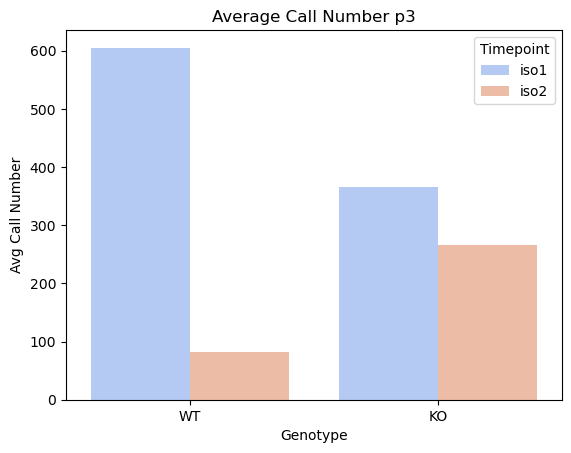

In [42]:
# graph male genotype differences in average call number

sns.barplot(data = pup_df_g,x = 'Genotype',y='File',hue='Timepoint', hue_order = ['iso1', 'iso2'],order = ['WT','KO'],palette='coolwarm')
plt.ylabel('Avg Call Number')
plt.xlabel('Genotype')
plt.title('Average Call Number p3')   


In [75]:
# graph male genotype differences in call number over time
first_min_ind = pup_df.index[(pup_df['Begin Time (s)'] >= 0) & (pup_df['Begin Time (s)'] <= 60)] #get indexes from time range
pup_df.loc[first_min_ind, 'Minute'] = 1 # add label for graphing to indicate timepoint

sec_min_ind = pup_df.index[(pup_df['Begin Time (s)'] >= 61) & (pup_df['Begin Time (s)'] <= 120)]
pup_df.loc[sec_min_ind, 'Minute'] = 2

thrd_min_ind = pup_df.index[(pup_df['Begin Time (s)'] >= 121) & (pup_df['Begin Time (s)'] <= 180)]
pup_df.loc[thrd_min_ind, 'Minute'] = 3

four_min_ind = pup_df.index[(pup_df['Begin Time (s)'] >= 181) & (pup_df['Begin Time (s)'] <= 300)]
pup_df.loc[four_min_ind, 'Minute'] = 4

pup_df_min_g = pup_df.groupby(['Genotype','Timepoint','Minute']).count() # count number of calls per minute
pup_df_min_g = pup_df_min_g.reset_index() # adds indices back to columns for graphing
pup_df_min_g


,Genotype,Timepoint,Minute,File,ID,Label,Accepted,Score,Begin Time (s),End Time (s),...,Principal Frequency (kHz),Low Freq (kHz),High Freq (kHz),Delta Freq (kHz),Frequency Standard Deviation (kHz),Slope (kHz/s),Sinuosity,Mean Power (dB/Hz),Tonality,Peak Freq (kHz)
0,KO,iso1,1.0,41,41,41,41,41,41,41,...,41,41,41,41,41,41,41,41,41,41
1,KO,iso1,2.0,57,57,57,57,57,57,57,...,57,57,57,57,57,57,57,57,57,57
2,KO,iso1,3.0,81,81,81,81,81,81,81,...,81,81,81,81,81,81,81,81,81,81
3,KO,iso1,4.0,186,186,186,186,186,186,186,...,186,186,186,186,186,186,186,186,186,186
4,KO,iso2,1.0,78,78,78,78,78,78,78,...,78,78,78,78,78,78,78,78,78,78
5,KO,iso2,2.0,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
6,KO,iso2,3.0,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31
7,KO,iso2,4.0,136,136,136,136,136,136,136,...,136,136,136,136,136,136,136,136,136,136
8,WT,iso1,1.0,64,64,64,64,64,64,64,...,64,64,64,64,64,64,64,64,64,64
9,WT,iso1,2.0,72,72,72,72,72,72,72,...,72,72,72,72,72,72,72,72,72,72


Text(0.5, 1.0, 'Avg Call per Minute Male')

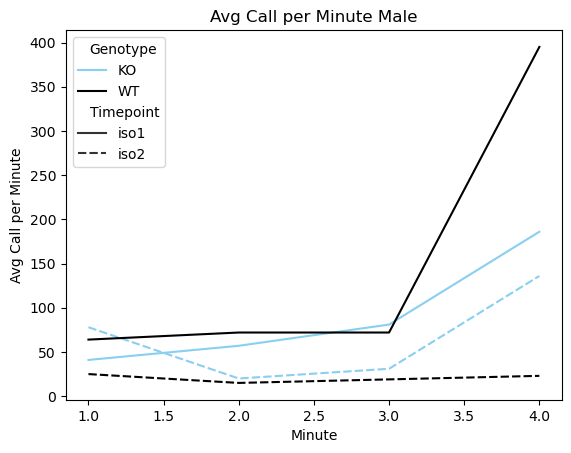

In [76]:
# cont
colors = ["#89CFF0", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=pup_df_min_g,x='Minute',y='ID',hue='Genotype',style='Timepoint',hue_order=['KO','WT'])
plt.ylabel('Avg Call per Minute')
plt.xlabel('Minute')
plt.title('Avg Call per Minute Male') 

Text(0.5, 1.0, 'Avg Call per Minute 1st Isolation')

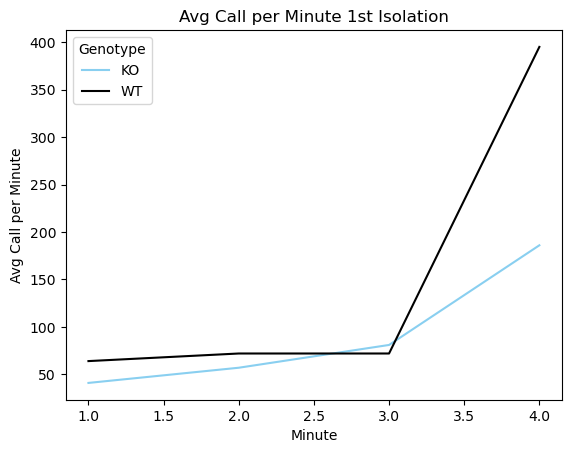

In [74]:
# graph just pre-mom
colors = ["#89CFF0", "#000000"]
sns.set_palette(sns.color_palette(colors))
test = pup_df_min_g.loc[pup_df_min_g['Timepoint'] == 'iso1']
sns.lineplot(data=test,x='Minute',y='ID',hue='Genotype')
plt.ylabel('Avg Call per Minute')
plt.xlabel('Minute')
plt.title('Avg Call per Minute 1st Isolation') 

Text(0.5, 1.0, 'Avg Call per Minute 2nd Isolation')

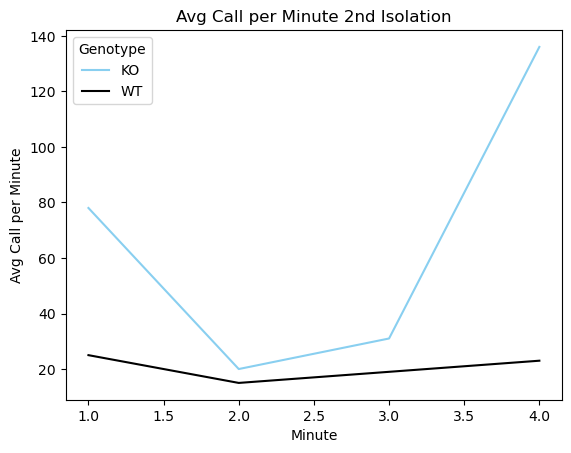

In [47]:
# graph just post-mom
test = pup_df_min_g.loc[pup_df_min_g['Timepoint'] == 'iso2']
sns.lineplot(data=test,x='Minute',y='ID',hue='Genotype')
plt.ylabel('Avg Call per Minute')
plt.xlabel('Minute')
plt.title('Avg Call per Minute 2nd Isolation') 

# Duration Comparison

Text(0.5, 1.0, 'Avg Duration')

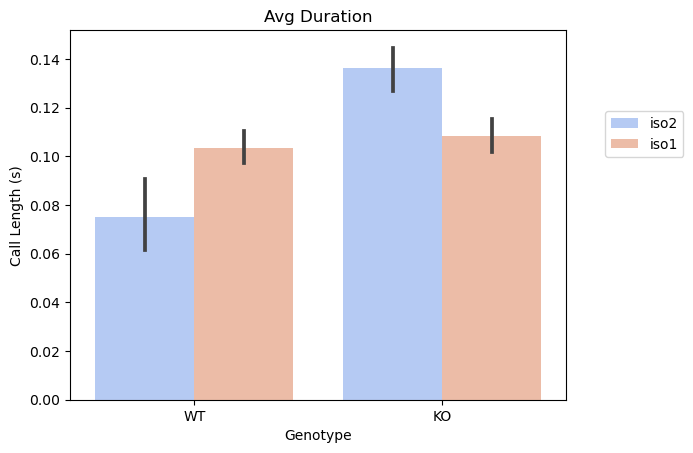

In [48]:
#both sexes
sns.barplot(data=pup_df,x='Genotype',y='Call Length (s)',hue='Timepoint',palette='coolwarm',order=['WT','KO'])
plt.legend(loc='upper right', bbox_to_anchor=(1.25, .8))
plt.title('Avg Duration') 

Text(0.5, 1.0, 'Avg Duration per Minute')

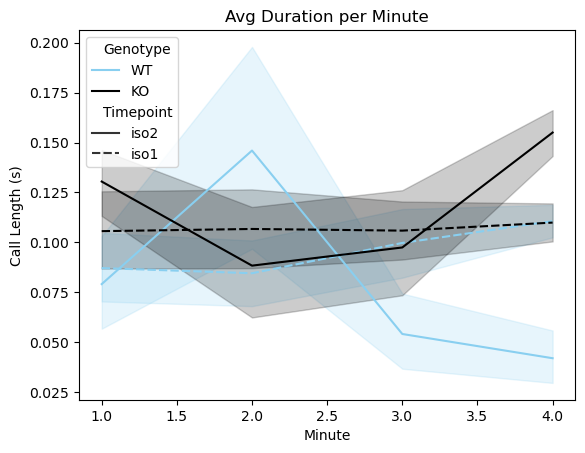

In [80]:
# duration over time both
colors = ["#89CFF0", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=test,x='Minute',y='Call Length (s)',hue='Genotype',style='Timepoint')
plt.title('Avg Duration per Minute') 

# Principal Freq

In [79]:
pup_df
test = pup_df.reset_index()
test

,index,File,ID,Label,Accepted,Score,Begin Time (s),End Time (s),Call Length (s),Principal Frequency (kHz),...,Delta Freq (kHz),Frequency Standard Deviation (kHz),Slope (kHz/s),Sinuosity,Mean Power (dB/Hz),Tonality,Peak Freq (kHz),Genotype,Minute,Timepoint
0,0,D:\Rat Pup call analysis\litter le 16 fmr1\p3\...,1,Usv,True,0.690815,0.044876,0.079959,0.035082,52.381162,...,1.795775,0.408459,-39.452935,1.048092,-75.596722,0.720937,52.680458,WT,1.0,iso2
1,1,D:\Rat Pup call analysis\litter le 16 fmr1\p3\...,2,Usv,True,0.917282,37.562044,37.613821,0.051776,43.119266,...,1.039755,0.333442,8.532215,1.119662,-90.032680,0.455021,43.379205,WT,1.0,iso2
2,2,D:\Rat Pup call analysis\litter le 16 fmr1\p3\...,3,Usv,True,0.534721,37.649007,37.665313,0.016306,30.375314,...,3.417085,1.330307,-168.786741,1.142231,-109.660727,0.199961,30.375314,WT,1.0,iso2
3,3,D:\Rat Pup call analysis\litter le 16 fmr1\p3\...,4,Flat,True,0.817622,41.276037,41.386155,0.110118,42.038043,...,3.913043,0.777406,-17.482311,1.621281,-81.213123,0.639960,43.342391,WT,1.0,iso2
4,4,D:\Rat Pup call analysis\litter le 16 fmr1\p3\...,5,Usv,True,0.767722,41.786509,41.791733,0.005224,41.349496,...,0.381166,0.208773,-58.376762,1.271527,-97.818981,0.379049,41.349496,WT,1.0,iso2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1326,397,D:\Rat Pup call analysis\litter le15 fmr1\p3\r...,6,Inverted_U,True,0.795375,83.304009,83.350457,0.046447,44.842094,...,2.402827,0.725677,-39.691387,1.173284,-77.436638,0.725098,45.142447,KO,2.0,iso2
1327,398,D:\Rat Pup call analysis\litter le15 fmr1\p3\r...,7,Downward_Ramp,True,0.508736,105.677868,105.683162,0.005294,65.381637,...,7.898230,3.774203,767.256637,5.963294,-103.317586,0.190047,63.501106,KO,2.0,iso2
1328,399,D:\Rat Pup call analysis\litter le15 fmr1\p3\r...,8,Downward_Ramp,True,0.661902,182.973703,182.992056,0.018353,61.450985,...,2.821577,1.204690,53.172662,2.522225,-103.281297,0.210152,62.509077,KO,4.0,iso2
1329,400,D:\Rat Pup call analysis\litter le15 fmr1\p3\r...,9,Usv,True,0.501538,258.900187,258.936310,0.036124,55.235253,...,4.456929,1.628478,-49.805320,1.432218,-102.896638,0.176167,54.439373,KO,4.0,iso2


Text(0.5, 1.0, 'Avg Principal Frequency')

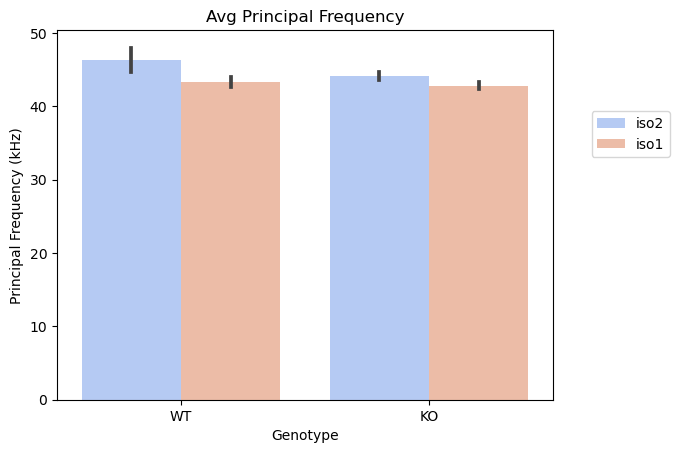

In [52]:
# both sexes
sns.barplot(data=pup_df,x='Genotype',y='Principal Frequency (kHz)',hue='Timepoint',palette='coolwarm',order=['WT','KO'])
plt.legend(loc='upper right', bbox_to_anchor=(1.25, .8))
plt.title('Avg Principal Frequency') 

# Slope Comparison

Text(0.5, 1.0, 'Avg Slope')

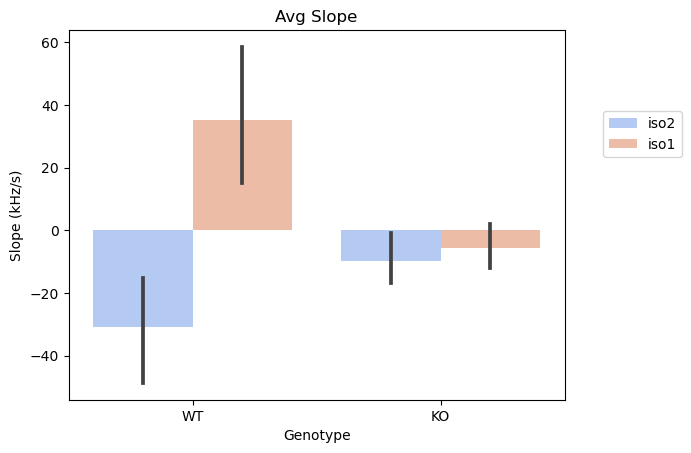

In [58]:
#both sexes
sns.barplot(data=pup_df,x='Genotype',y='Slope (kHz/s)',hue='Timepoint',palette='coolwarm',order=['WT','KO'])
plt.legend(loc='upper right', bbox_to_anchor=(1.25, .8))
plt.title('Avg Slope') 


Text(0.5, 1.0, 'Avg Slope per Minute')

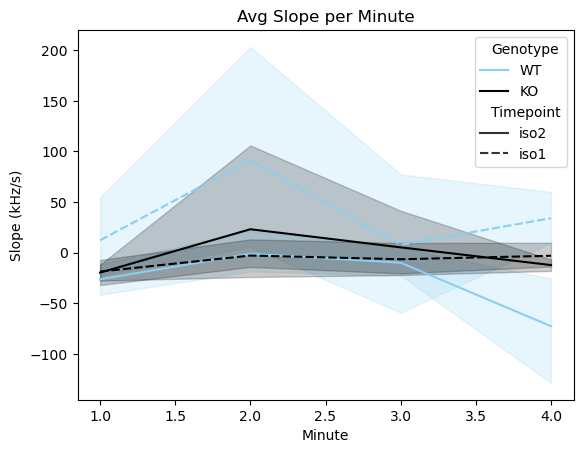

In [81]:
# duration over time both sexes
colors = ["#89CFF0", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=test,x='Minute',y='Slope (kHz/s)',hue='Genotype',style='Timepoint')
plt.title('Avg Slope per Minute') 

# Delta Frequency 


Text(0.5, 1.0, 'Avg Delta Frequency')

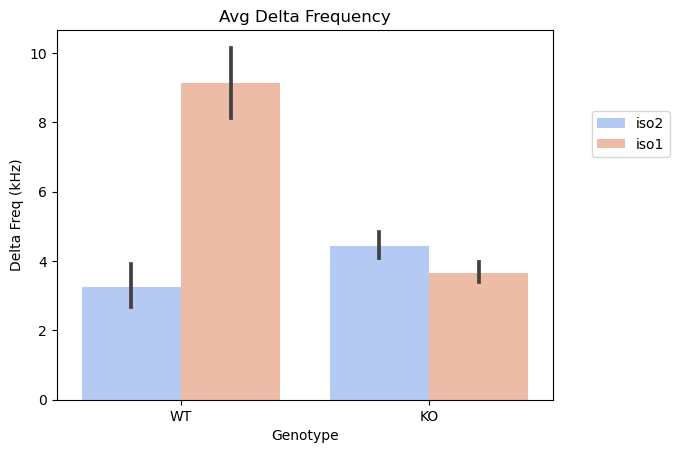

In [60]:
#both sexes
sns.barplot(data=pup_df,x='Genotype',y='Delta Freq (kHz)',hue='Timepoint',palette='coolwarm',order=['WT','KO'])
plt.legend(loc='upper right', bbox_to_anchor=(1.25, .8))
plt.title('Avg Delta Frequency') 


Text(0.5, 1.0, 'Avg Delta Frequency per Minute')

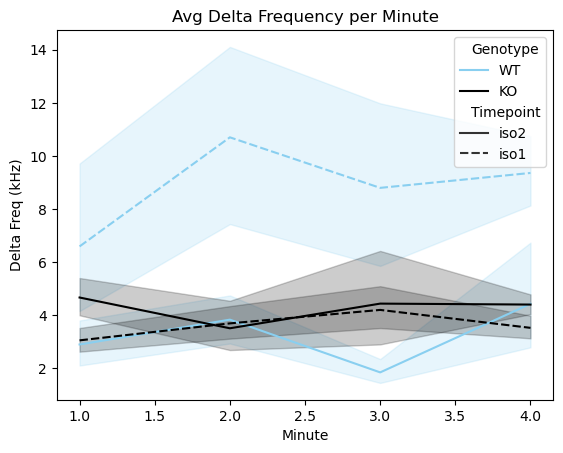

In [82]:
# duration over time both sexes
colors = ["#89CFF0", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=test,x='Minute',y='Delta Freq (kHz)',hue='Genotype',style='Timepoint')
plt.title('Avg Delta Frequency per Minute') 

# Sinusoity

Text(0.5, 1.0, 'Avg Sinuosity Frequency')

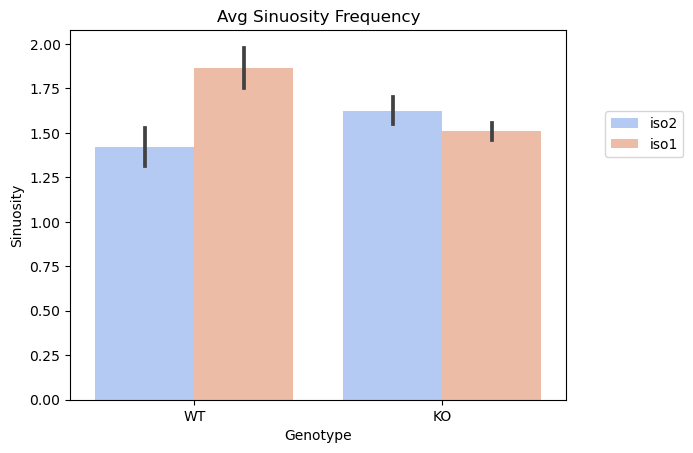

In [62]:
#both sexes
sns.barplot(data=pup_df,x='Genotype',y='Sinuosity',hue='Timepoint',palette='coolwarm',order=['WT','KO'])
plt.legend(loc='upper right', bbox_to_anchor=(1.25, .8))
plt.title('Avg Sinuosity Frequency')

Text(0.5, 1.0, 'Avg Sinuosity per Minute')

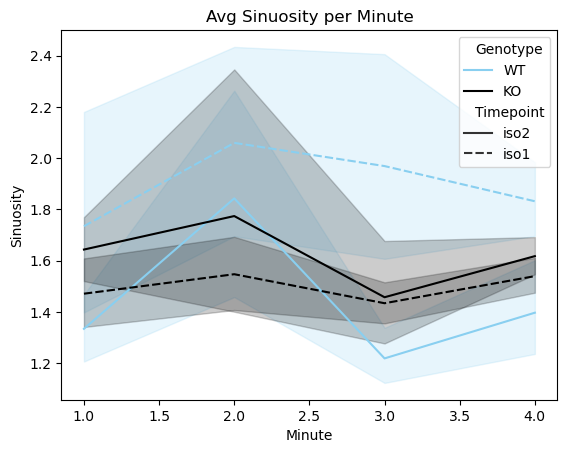

In [83]:
# duration over time both sexes
colors = ["#89CFF0", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=test,x='Minute',y='Sinuosity',hue='Genotype',style='Timepoint')
plt.title('Avg Sinuosity per Minute') 

# Mean Power


Text(0.5, 1.0, 'Avg Mean Power (dB/Hz)')

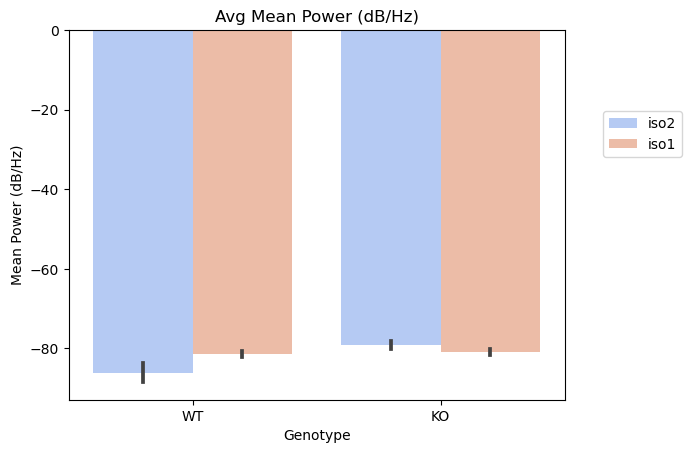

In [64]:
#both sexes
sns.barplot(data=pup_df,x='Genotype',y='Mean Power (dB/Hz)',hue='Timepoint',palette='coolwarm',order=['WT','KO'])
plt.legend(loc='upper right', bbox_to_anchor=(1.25, .8))
plt.title('Avg Mean Power (dB/Hz)')

Text(0.5, 1.0, 'Avg Mean Power per Minute')

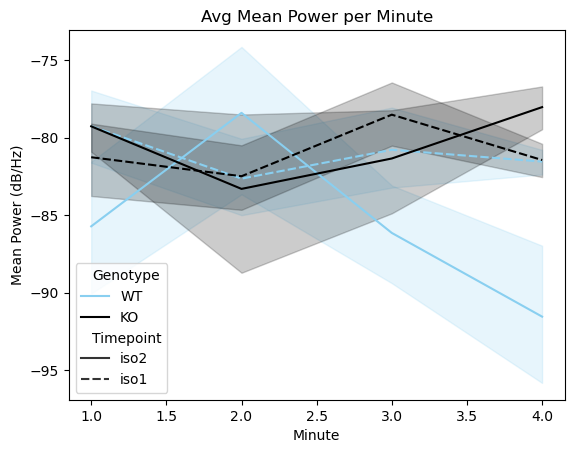

In [84]:
# duration over time both sexes
colors = ["#89CFF0", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=test,x='Minute',y='Mean Power (dB/Hz)',hue='Genotype',style='Timepoint')
plt.title('Avg Mean Power per Minute') 

# Tonality

Text(0.5, 1.0, 'Avg Tonality')

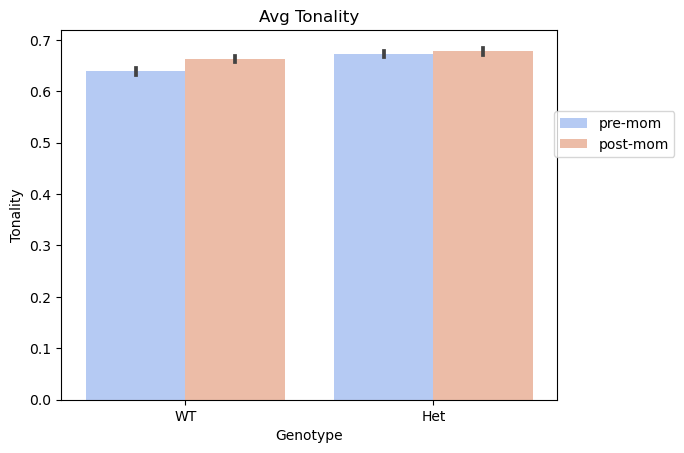

In [27]:
#both sexes
sns.barplot(data=pup_df,x='Genotype',y='Tonality',hue='Timepoint',palette='coolwarm',order=['WT','Het'])
plt.legend(loc='upper right', bbox_to_anchor=(1.25, .8))
plt.title('Avg Tonality')

Text(0.5, 1.0, 'Avg Tonality per Minute')

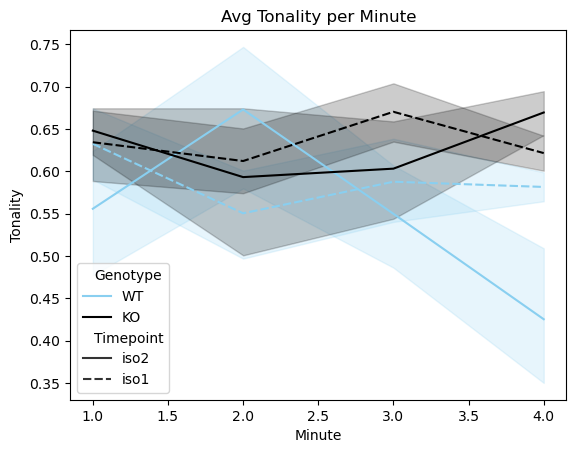

In [85]:
# duration over time both sexes
colors = ["#89CFF0", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=test,x='Minute',y='Tonality',hue='Genotype',style='Timepoint')
plt.title('Avg Tonality per Minute') 

# Call Type Comparison

In [66]:
# pie chart between wt and het
KO_flat_df = pup_df.loc[pup_df['Genotype'] == 'KO']
wt_flat_df = pup_df.loc[pup_df['Genotype'] == 'WT']
wt_flat_df

,File,ID,Label,Accepted,Score,Begin Time (s),End Time (s),Call Length (s),Principal Frequency (kHz),Low Freq (kHz),...,Delta Freq (kHz),Frequency Standard Deviation (kHz),Slope (kHz/s),Sinuosity,Mean Power (dB/Hz),Tonality,Peak Freq (kHz),Genotype,Minute,Timepoint
0,D:\Rat Pup call analysis\litter le 16 fmr1\p3\...,1,Usv,True,0.690815,0.044876,0.079959,0.035082,52.381162,52.081866,...,1.795775,0.408459,-39.452935,1.048092,-75.596722,0.720937,52.680458,WT,1.0,iso2
1,D:\Rat Pup call analysis\litter le 16 fmr1\p3\...,2,Usv,True,0.917282,37.562044,37.613821,0.051776,43.119266,42.859327,...,1.039755,0.333442,8.532215,1.119662,-90.032680,0.455021,43.379205,WT,1.0,iso2
2,D:\Rat Pup call analysis\litter le 16 fmr1\p3\...,3,Usv,True,0.534721,37.649007,37.665313,0.016306,30.375314,29.521043,...,3.417085,1.330307,-168.786741,1.142231,-109.660727,0.199961,30.375314,WT,1.0,iso2
3,D:\Rat Pup call analysis\litter le 16 fmr1\p3\...,4,Flat,True,0.817622,41.276037,41.386155,0.110118,42.038043,41.385870,...,3.913043,0.777406,-17.482311,1.621281,-81.213123,0.639960,43.342391,WT,1.0,iso2
4,D:\Rat Pup call analysis\litter le 16 fmr1\p3\...,5,Usv,True,0.767722,41.786509,41.791733,0.005224,41.349496,40.968330,...,0.381166,0.208773,-58.376762,1.271527,-97.818981,0.379049,41.349496,WT,1.0,iso2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,D:\Rat Pup call analysis\litter le15 fmr1\p3\r...,17,Usv,True,0.815751,80.341147,80.370371,0.029224,45.046083,43.283410,...,5.875576,1.751441,-171.568082,1.266494,-88.125502,0.452771,48.375576,WT,4.0,iso2
307,D:\Rat Pup call analysis\litter le15 fmr1\p3\r...,18,Usv,True,0.728575,139.793098,139.832586,0.039488,44.642210,44.642210,...,24.637681,6.412141,-536.742078,1.166702,-90.787191,0.293623,44.642210,WT,4.0,iso2
308,D:\Rat Pup call analysis\litter le15 fmr1\p3\r...,19,Usv,True,0.520883,184.093604,184.120287,0.026682,43.082562,36.261574,...,7.345679,2.873853,-136.701197,1.443712,-106.236512,0.206261,36.261574,WT,4.0,iso2
309,D:\Rat Pup call analysis\litter le15 fmr1\p3\r...,20,Usv,True,0.686909,188.945521,188.979692,0.034171,45.185918,37.116297,...,9.683544,4.445563,-10.225125,1.996583,-103.242907,0.187134,37.116297,WT,4.0,iso2


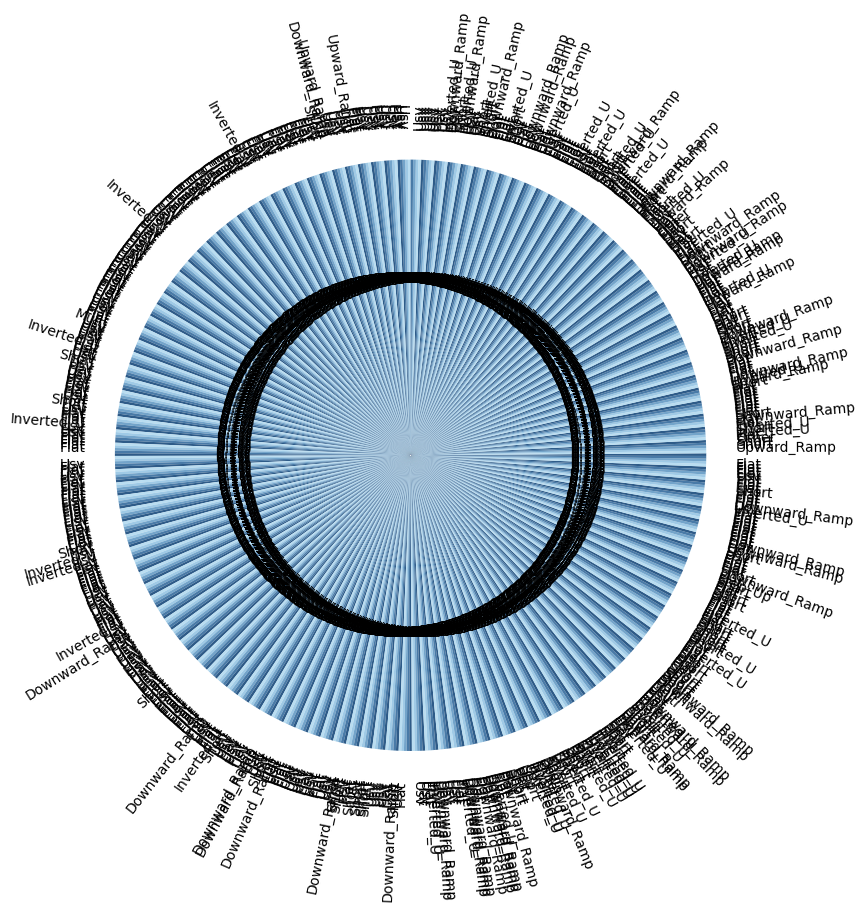

In [67]:
# WT pie chart

wtdata = wt_flat_df['Accepted']
wtdata = np.array(wtdata)
wtlabel = wt_flat_df['Label']
wtlabel = np.array(wtlabel)
colors = ["#B9DDF1", "#9FCAE6", "#73A4CA", "#497AA7", "#2E5B88"]
plt.pie(wtdata, labels = wtlabel,startangle = 90,autopct = '%1.1f%%',rotatelabels = True,colors = colors,radius=2)
plt.show()


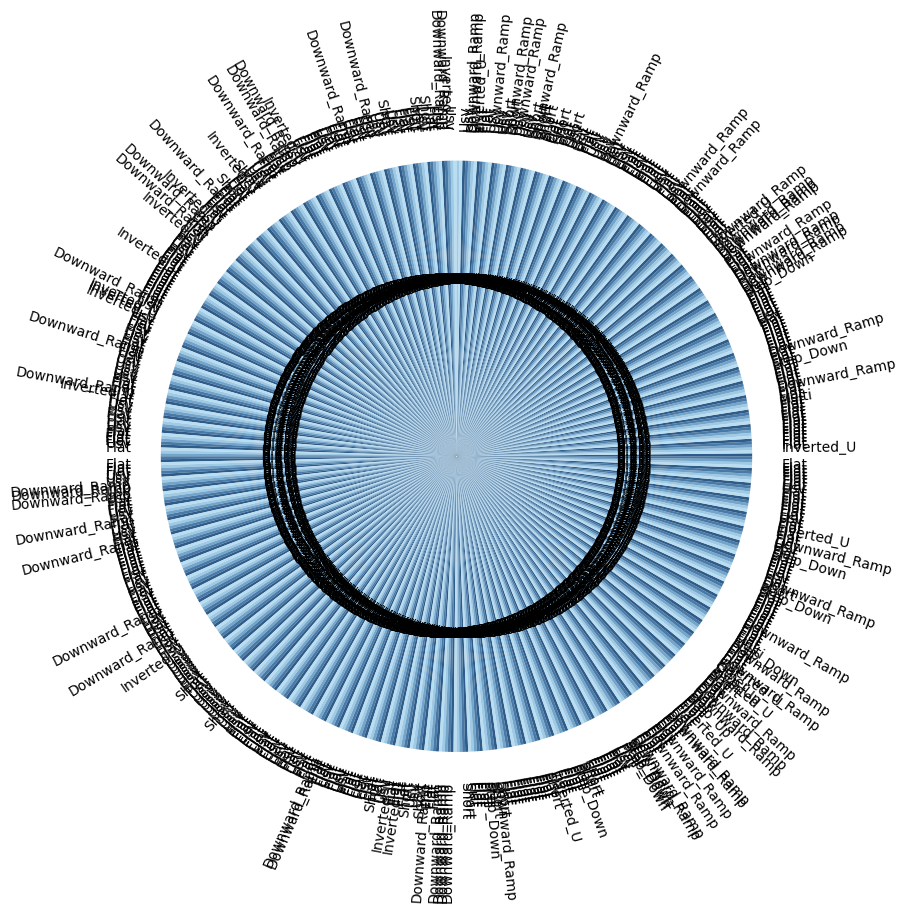

In [71]:
# het pie chart
hetdata = KO_flat_df['Accepted']
hetdata = np.array(hetdata)
hetlabel = KO_flat_df['Label']
hetlabel = np.array(hetlabel)
colors = ["#B9DDF1", "#9FCAE6", "#73A4CA", "#497AA7", "#2E5B88"]
plt.pie(hetdata, labels = hetlabel,startangle = 90,autopct = '%1.1f%%',rotatelabels = True,colors = colors,radius=2)
plt.show()